In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.rcdefaults()  # reset to default
plt.style.use('phys-plots.mplstyle')

# Quadrupole force plots 

In [5]:
x, y, z, w0, k = sp.symbols('x,y,z,w0,k', real=True)
mm = sp.symbols('mm')

#alpha_Qm = sp.symbols('alpha_Qm')
#epsilon, mu, A = sp.symbols('epsilon, mu, A', positive=True)

A = 1
mu = 1
alpha_Qm = 1

H0 = A/sp.sqrt(mu)

coords = [x, y, z]

i, j, p = sp.symbols('i, j, p', integer=True)

z0 = k * w0**2 / 2
w = w0 * sp.sqrt(1 + z**2 / z0**2)
Rinv = z / (z**2 + z0**2)
eta = sp.atan2(z, z0)

gauss_parax = w0/w * sp.exp( -(x**2 + y**2)/w**2 ) * sp.exp(1j * (k * z - eta + k*(x**2 + y**2) / 2 * Rinv)) 
gauss_parax_simple = sp.exp( -(x**2 + y**2)/w0**2 )


intensity = sp.Abs(gauss_parax)**2
intensity_simple = sp.Abs(gauss_parax_simple)**2


ux = 1 / sp.sqrt(1 + sp.Abs(mm)**2)
uy = mm / sp.sqrt(1 + sp.Abs(mm)**2)

def eps(i, j, k):
    return sp.LeviCivita(i, j, k)

def get_FQm(gauss_parax_func):
    umagpol = [-uy, ux, 0]
    H = [H0 * umagpol[0] * gauss_parax_func, H0 * umagpol[1] * gauss_parax_func, 0]


    Qm = [
        [mu*alpha_Qm * 1/2 * (sp.diff(H[i], coords[j]) + sp.diff(H[j], coords[i]))
         for i in range(3)]
         for j in range(3)
    ]

    # ∇_i ∇_j H_p
    grad_grad_H = [[[sp.diff(H[p], coords[i], coords[j]) for p in range(3)]
          for j in range(3)]
          for i in range(3)]
    
    # Magnetic quadrupole force
    # FQm_i = 1/4 Re[Qm_jk^* ∇_i ∇_k H_j]
    FQm = [1/4 * sp.re(sum(sp.conjugate(Qm[j][k]) * grad_grad_H[i][k][j] for j in range(3) for k in range(3))) for i in range(3)]

    return FQm

FQm = get_FQm(gauss_parax)
FQm_simple = get_FQm(gauss_parax_simple)

In [6]:
intensity_num = sp.lambdify((x, y, z, w0, k, mm), intensity, 'numpy')

Fx = sp.lambdify((x, y, z, w0, k, mm), FQm[0], 'numpy')
Fy = sp.lambdify((x, y, z, w0, k, mm), FQm[1], 'numpy')

Fx_simple = sp.lambdify((x, y, z, w0, k, mm), FQm_simple[0], 'numpy')
Fy_simple = sp.lambdify((x, y, z, w0, k, mm), FQm_simple[1], 'numpy')

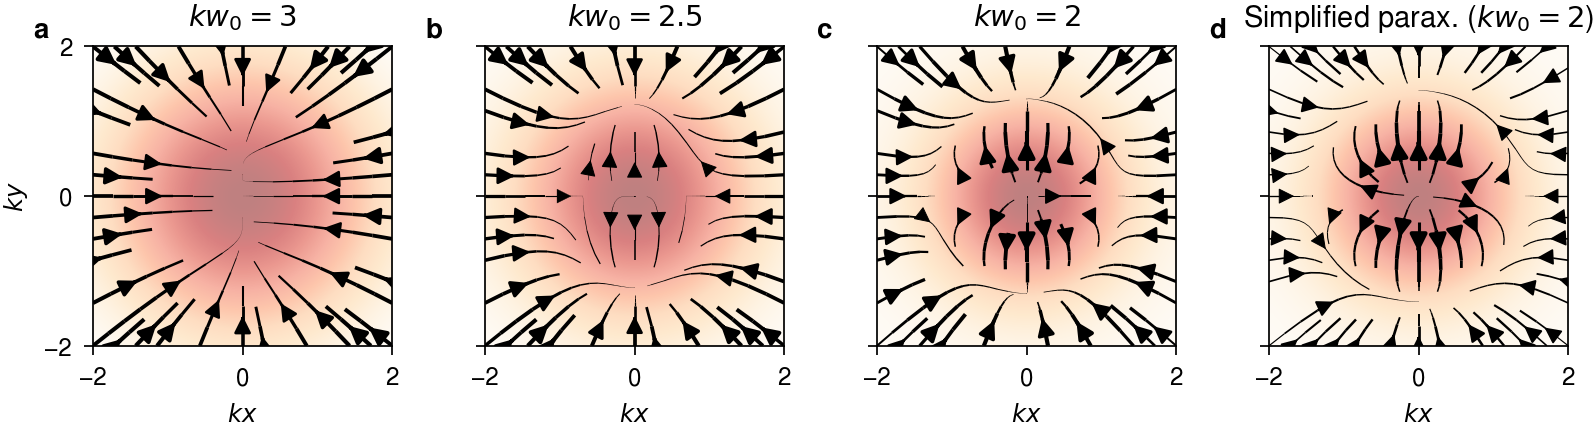

In [62]:
z = 0
#wavelength = 1
k = 1
wavelength = 2*np.pi/k
mm = 0j


plotbox = 2/k
N = 40

x = np.linspace(-plotbox, stop=plotbox, num=N)
y = np.linspace(-plotbox, stop=plotbox, num=N)

X, Y = np.meshgrid(x, y)


FX = Fx(X, Y, z, w0, k, mm)
FY = Fy(X, Y, z, w0, k, mm)
FMAG = np.sqrt(FX**2 + FY**2)
lw = FMAG / np.max(FMAG)


FX_simple = Fx_simple(X, Y, z, w0, k, mm)
FY_simple = Fy_simple(X, Y, z, w0, k, mm)



fig, axs = plt.subplot_mosaic(
    """
    ABCD
    """, figsize=(6.5, 2), sharex=True, sharey=True
)

ticks = [-plotbox, 0, plotbox]


# parax 1
kw0 = 3
w0 = kw0 / k
H2 = intensity_num(X, Y, z, w0, k, mm)
FX = Fx(X, Y, z, w0, k, mm)
FY = Fy(X, Y, z, w0, k, mm)
FMAG = np.sqrt(FX**2 + FY**2)
lw = FMAG / np.max(FMAG)

axs['A'].set_title(f'$k w_0 = {kw0}$')
axs['A'].imshow(H2, cmap='OrRd', alpha=0.5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', interpolation='bilinear')
axs['A'].streamplot(X, Y, FX, FY, linewidth=1.2*lw, density=0.5, color='k')


# parax 2
kw0 = 2.5
w0 = kw0 / k
H2 = intensity_num(X, Y, z, w0, k, mm)
FX = Fx(X, Y, z, w0, k, mm)
FY = Fy(X, Y, z, w0, k, mm)
FMAG = np.sqrt(FX**2 + FY**2)
lw = FMAG / np.max(FMAG)

axs['B'].set_title(f'$k w_0 = {kw0}$')
axs['B'].imshow(H2, cmap='OrRd', alpha=0.5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', interpolation='bilinear')
axs['B'].streamplot(X, Y, FX, FY, linewidth=1.2*lw, density=0.5, color='k')

# parax 3
kw0 = 2
w0 = kw0 / k
H2 = intensity_num(X, Y, z, w0, k, mm)
FX = Fx(X, Y, z, w0, k, mm)
FY = Fy(X, Y, z, w0, k, mm)
FMAG = np.sqrt(FX**2 + FY**2)
lw = FMAG / np.max(FMAG)

axs['C'].set_title(f'$k w_0 = {kw0}$')
axs['C'].imshow(H2, cmap='OrRd', alpha=0.5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', interpolation='bilinear')
axs['C'].streamplot(X, Y, FX, FY, linewidth=1.2*lw, density=0.5, color='k')

# parax simple
kw0 = 2
w0 = kw0 / k
H2 = intensity_num(X, Y, z, w0, k, mm)
FX = Fx_simple(X, Y, z, w0, k, mm)
FY = Fy_simple(X, Y, z, w0, k, mm)
FMAG = np.sqrt(FX**2 + FY**2)
lw = FMAG / np.max(FMAG)

axs['D'].set_title(f'Simplified parax. ($k w_0 = {kw0}$)')
axs['D'].imshow(H2, cmap='OrRd', alpha=0.5, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', interpolation='bilinear')
axs['D'].streamplot(X, Y, FX, FY, linewidth=1.2*lw, density=0.5, color='k')

for ax in "ABCD":
    axs[ax].set_xticks(ticks)
    axs[ax].set_yticks(ticks)
    axs[ax].set_aspect('equal')
    axs[ax].set_xlabel('$k x$')

axs['A'].set_ylabel('$k y$')

labels = ['a', 'b', 'c', 'd']
for ax, label in zip("ABCD", labels):
    axs[ax].text(
        -0.2, 1.1, label, transform=axs[ax].transAxes,
        fontsize=8, va='top', ha='left', weight='bold'
    )

plt.savefig('results/parax_vs_simple_parax.pdf')
plt.show()